
The cell below processes energy data from .xlsx files, for the years 2021, 2022 and 2023. It converts the x1 and x2 columns to datetime format, filling any missing x2 values with the x1 value of the next row (except for the last row, which is ignored if x2 is missing). It calculates the total energy produced and the total duration in hours (we multiply the power by 1/6 , as the reading is taken every 10 minutes) for each file, along with the corresponding day. The results are stored in a list, sorted by date, and then saved to a CSV file named energy_stats_2021_2022_2023.csv.

In [34]:
import pandas as pd
import os

def calculate_energy_stats(data):
    data['x1'] = pd.to_datetime(data['x1'], format='%Y-%m-%d %H:%M:%S')
    data['x2'] = pd.to_datetime(data['x2'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    data['x2'].fillna(data['x1'].shift(-1), inplace=True) 
    data.dropna(subset=['x2'], inplace=True)

    total_energy_produced = (data['ActivePower'] * (1/6)).sum()
    total_duration_hours = (data['x2'].max() - data['x1'].min()).total_seconds() / 3600
    day = data['x1'].min().date() 

    return day, total_energy_produced, total_duration_hours


directory = './data'
rated_capacity = 1000 * 24
energy_stats_list = []

for filename in os.listdir(directory):
    if filename.endswith('.xlsx') and ('2021' in filename or '2022' in filename or '2023' in filename):
        file_path = os.path.join(directory, filename)
        data = pd.read_excel(file_path)
        day, total_energy_produced, total_duration_hours = calculate_energy_stats(data)

        energy_stats_list.append({
            'Day': day,
            'Total Energy Produced (kWh)': total_energy_produced,
            'Total Duration (hours)': total_duration_hours
        })

energy_stats_df = pd.DataFrame(energy_stats_list)
energy_stats_df = energy_stats_df.sort_values(by='Day')
output_csv = 'energy_stats_2021_2022_2023.csv'
energy_stats_df.to_csv(output_csv, index=False)

print(f"Energy stats saved to {output_csv}")


/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_17719/3388429222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['x2'].fillna(data['x1'].shift(-1), inplace=True)
/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_17719/3388429222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Energy stats saved to energy_stats_2021_2022_2023.csv


/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_17719/3388429222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['x2'].fillna(data['x1'].shift(-1), inplace=True)
/var/folders/ms/jcbjc8jx1414fy57pjk6fh780000gn/T/ipykernel_17719/3388429222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Find the capacity factor for every month.
The total rated energy can be calculated as 1000*24*30 (number of hours in a month multiplied by th peak rated power 1MWp)

In [38]:
import pandas as pd

data = pd.read_csv('energy_stats_2021_2022_2023.csv')
data['Day'] = pd.to_datetime(data['Day'], format='%Y-%m-%d')
data['Month'] = data['Day'].dt.to_period('M')
monthly_data = data.groupby('Month').agg(
    Total_Energy_Produced=('Total Energy Produced (kWh)', 'sum'),
    Total_Duration_Hours=('Total Duration (hours)', 'sum')
).reset_index()
monthly_data['Capacity_Factor'] = monthly_data['Total_Energy_Produced'] / (24 * 1000 * 30)
output_csv = 'monthly_capacity_factors.csv'
monthly_data[['Month', 'Capacity_Factor']].to_csv(output_csv, index=False)

print(f"Monthly capacity factors saved to {output_csv}")


Monthly capacity factors saved to monthly_capacity_factors.csv


Let plot a line graph of Capacity factopr vs Month

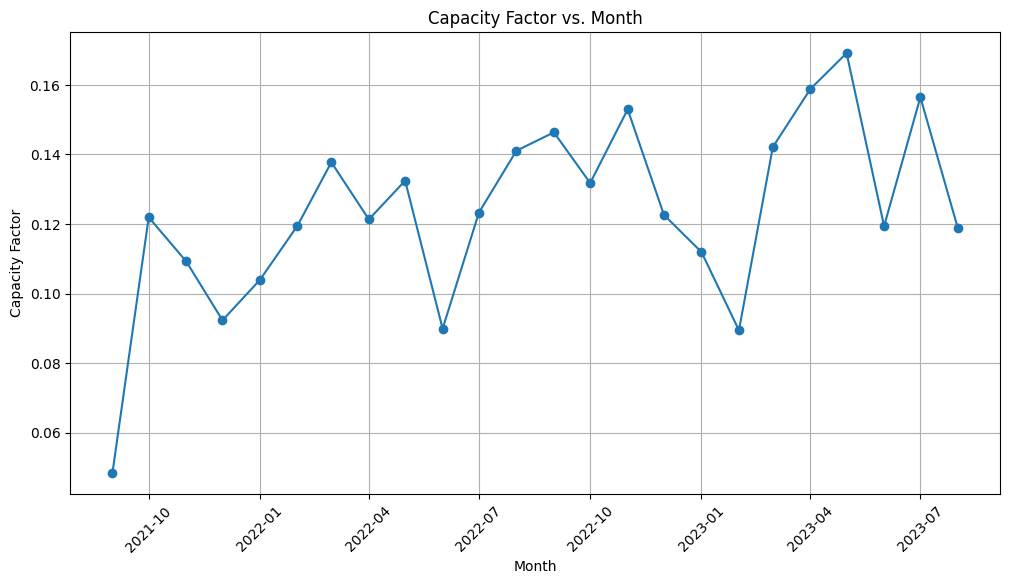

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./monthly_capacity_factors.csv") 
data["Month"] = pd.to_datetime(data["Month"])


plt.figure(figsize=(12, 6))
plt.plot(data["Month"], data["Capacity_Factor"], marker="o", linestyle="-")
plt.title("Capacity Factor vs. Month")
plt.xlabel("Month")
plt.ylabel("Capacity Factor")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()